# SC2001 Project 1 (Lab Group A33, Group 1)
## Integration of Mergesort & Insertion Sort


> In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. <br><br>
> Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.


In [1]:
# Imports
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed to ensure that our data does not change in the future.
np.random.seed(10)

import seaborn as sb
import math
sb.set()

### a) Algorithm Implementation

> Implement the above hybrid algorithm.

In [2]:
# Create an Object to store the Number of Key Comparisons in our Sorting Methods
class KeyComparisons:
    def __init__(self, numKeyComparisons):
        self.numKeyComparisons = numKeyComparisons
    def incrementKeyComparisons(self, incrementValue):
        self.numKeyComparisons += incrementValue
    def resetKeyComparisons(self):
        self.numKeyComparisons = 0
    def returnKeyComparisons(self):
        return self.numKeyComparisons

# Declaring a Constant for Fixed Threshold Value
def FIXED_THRESHOLD_VALUE():
    return 10

### Insertion Sort

In [3]:
def insertionSort(arr, comparisonsObject):
    
    # Traverse for each element from index 1 to end of list. First element can be ignored.
    for i in range(1, len(arr)):
        key = arr[i] # Pick out the element at the i-th position
        j = i-1 # j will be the running index for all the elements before elem
        
        while j >= 0 and key < arr[j]: # While it hasn't reached the first element and the key is smaller than the previous elements, we will shift the j-th element to the j+1-th position
            comparisonsObject.incrementKeyComparisons(1)
            arr[j+1] = arr[j]
            j-=1
        comparisonsObject.incrementKeyComparisons(1)
        
        arr[j+1] = key # If we reach an element that is smaller than the key or the start of the list (j=-1), we will insert the key to the right of that element or at index 0 if it reached start of list.
    return arr

### Hybrid Sort

In [4]:
# Merge function which will be used in the hybrid sort when merge sort is chosen over insertion sort.

def merge(arr1, arr2, comparisonsObject):
    # initialise indices for each array
    i = 0
    j = 0
    
    # initialise final sorted array
    sorted_arr = []
    
    # While both halves are not empty, we compare the 1st elements of the 2 lists
    while i != len(arr1) and j != len(arr2):
        # Keeping track of the Number of Comparisons
        comparisonsObject.incrementKeyComparisons(1)
        # if first element of 1st list is smaller, 1st element of first half joins the end of the merged list
        if arr1[i] < arr2[j]:
            sorted_arr.append(arr1[i])
            i += 1
        # else if 1st element of 2nd list is smaller, move the 1st element of 2nd half to the end of the merged list
        elif arr2[j] < arr1[i]:
            sorted_arr.append(arr2[j])
            j += 1
        # else if they are equal, move both the 1st element of the first list and the second list to the merged list
        else:
            comparisonsObject.incrementKeyComparisons(3)
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
    # if first list still has elements, copy all the elements in the first list to the merged list
    while i != len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    # if second list still has elements, copy all the elements in the second list to the merged list
    while j != len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    return sorted_arr

In [5]:
# Hybrid Sort takes in parameters of an array and array size limit S.
# If array size is <= S, insertion sort will be used 
# If array size is > S , merge sort will be used instead

def hybridSort(arr,S, comparisonsObject):
    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    
    # Merge Sort 
    if len(arr) > S:
        # Use the middle element to divide the array into two halves
        m = len(arr)//2
        
        # Sort first half recursively
        arr[:m] = hybridSort(arr[:m],S, comparisonsObject)
        # Sort second half recursively
        arr[m:] = hybridSort(arr[m:], S, comparisonsObject)
        arr = merge(arr[:m], arr[m:], comparisonsObject)
        return arr
    
    # Insertion Sort
    else:
        arr = insertionSort(arr, comparisonsObject)
        return arr

### Testing the sorting algorithms


In [6]:
arr = [4,2,10,100,3,59,43,-1,-8,0,7,12,11,3,3,3]
comparisonsObject = KeyComparisons(0)   

print(hybridSort(arr,3, comparisonsObject))

[-8, -1, 0, 2, 3, 3, 3, 3, 4, 7, 10, 11, 12, 43, 59, 100]


## b) Generate input data

> Generate arrays of increasing sizes, in a range from
1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [7]:
# Generate the required sizes of the arrays programatically from the range of 1,000 to 10 million.

inputDataSizes = []

for i in range(10):
    inputDataSizes.append((i+1) * 1000)
    inputDataSizes.append((i+1) * 10000)
    inputDataSizes.append((i+1) * 100000)
    inputDataSizes.append((i+1) * 1000000)

# Remove duplicates and sort the input data sizes
inputDataSizes = sorted(set(inputDataSizes))
print(inputDataSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [8]:
# List of List of data
inputData = []

# Iterate through the data sizes array
for s in inputDataSizes:
    # For each datasize, we generate a random data array of size (s), each array will contain random integers from 1 to s.
    data = np.random.randint(1,s+1,size = s)
    inputData.append(data)
    
# Checking for the array of size 1000 that the generation was done correctly.    
for i in range(len(inputData)):
    print("Array Size: ", len(inputData[i]))
    print("Min of this array:" , min(inputData[i]))
    print("Max of this array:" , max(inputData[i]))
    print()

Array Size:  1000
Min of this array: 1
Max of this array: 999

Array Size:  2000
Min of this array: 3
Max of this array: 1998

Array Size:  3000
Min of this array: 2
Max of this array: 2998

Array Size:  4000
Min of this array: 1
Max of this array: 4000

Array Size:  5000
Min of this array: 3
Max of this array: 4999

Array Size:  6000
Min of this array: 1
Max of this array: 5999

Array Size:  7000
Min of this array: 1
Max of this array: 6999

Array Size:  8000
Min of this array: 2
Max of this array: 7999

Array Size:  9000
Min of this array: 4
Max of this array: 9000

Array Size:  10000
Min of this array: 2
Max of this array: 10000

Array Size:  20000
Min of this array: 1
Max of this array: 19999

Array Size:  30000
Min of this array: 1
Max of this array: 30000

Array Size:  40000
Min of this array: 1
Max of this array: 39998

Array Size:  50000
Min of this array: 3
Max of this array: 50000

Array Size:  60000
Min of this array: 1
Max of this array: 59999

Array Size:  70000
Min of thi

# c) Analyse Time Complexity

## c)i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [9]:
def insertionSort2(arr):
    comparisons = 0
    for i in range(1, len(arr)): # Traverse through array from index 1
        key = arr[i] # Pick up value at each index starting from index 1
        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right 
        if j > 0 :
            comparisons += 1
        arr[j + 1] = key 
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr, comparisons

def merge2(arr1, arr2): 
    comparisons = 0 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
        comparisons += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr, comparisons

def hybridSort2(arr,S):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    
    if len(arr) > S:
        m = len(arr)//2 
        arr[:m], first_half_comparisons = hybridSort2(arr[:m],S)
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = hybridSort2(arr[m:],S)
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        return arr, comparisons
    else:
        arr, comparisons = insertionSort2(arr)
        return arr, comparisons
    

In [10]:
arr = [3,6,8,9,2,1,4,5,10,7,12,11,3,3,3]
hybridSort2(arr,4)

([1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 36)

In [11]:
from random import seed
from random import randint

np.random.seed(22)
arrSize = []

for i in range(1000):
    arrSize.append(i)
s = 10
if __name__ == '__main__':
    sizeComparisons = []
    timeTakenArray = []
    for siz in arrSize:
        arr = np.random.randint(10000, size=siz)
        start = time.time()
        arr, comparisons = hybridSort2(arr,s)
        end = time.time()
        timeTaken = end-start
        sizeComparisons.append(comparisons)
        timeTakenArray.append(timeTaken)

Text(0.5, 1.0, 'Key Comparisons against Array Size')

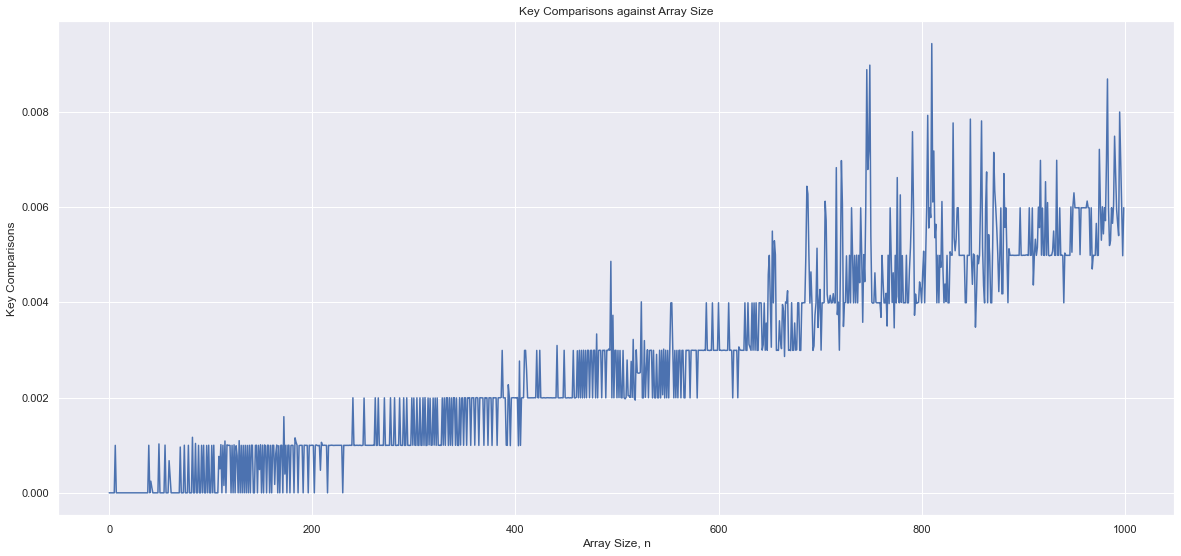

In [13]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arrSize, timeTakenArray)
ax.set_xlabel("Array Size, n")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size")


# Analysis for c(i)

Using the hybrid algorithm, we perform Insertion Sort when the size of the n/s (n elements / s threshold size) array is below a threshold s. Then, we are performing Insertion Sort on arrays, where each array is size s.

We know the average and worst-case time complexity of Insertion Sort is *O(s2)*. Thus, the total time complexity of the Insertion Sort component of our hybrid algorithm is:

    n/s x *O(s2)* 
    = O(ns)*

If we consider the best-case, then the total time complexity will be:

    n/s x *O(s)* 
    = *O(n)*

Next, performing the Merge operation on the sorted arrays. In traditional Merge Sort, this Merge operation is done on log n levels. However, since we switched to Insertion Sort wherein the array size is fixed at s, the Merge operation is only called on log (n/s) levels.

Each level compares n elements. Therefore, the total time complexity of the Merge Sort component of our hybrid algorithm is:
    
    n x log (n/s) = *O(n log (n/s))*

Hence, the total time complexity of the hybrid algorithm is:

    At worst and average-case: *O(ns + n log (n/s))*

    At best-case: *O(n + n log (n/s))*

Compare with Empirical Data
    When s is fixed, the time complexity of the hybrid algorithm can be simplified to *O(n + n log n)* = *O(n log n) , so long as s* does not approach n.

Since we set our s to be very small (10), we expect our time complexity to be: 

     *O(n log n)*.

We note that the hybrid algorithm does more key comparisons than the merge sort algorithm. This is to be expected since the hybrid algorithm incorporated the Insertion Sort algorithm, whose runtime is *O(n2)* => more key comparisons than *O(n log n)*.

We note that the hybrid algorithm has a lower elapsed time than the merge sort algorithm. This is also to be expected since the small sub-arrays are sorted more quickly using Insertion Sort, resulting in lesser elapsed time.

## c)ii) With the value of N fixed, plot the number of key comparisons over different sizes of the threshold value S. Compare your empirical results with your theoretical analysis of the time complexity.

From Part 1 we have derived the time complexity of our hybrid algorithm to be 

    *O(ns + n log (n/s))*   (Considering the worst and average-case).

With the value of n fixed, the time complexity can be simplified to *O(s), so long as n* does not approach s.

Since our n is set to 10000 and s is set to have an lower limit of 10000, we expect the time complexity to be linear.

Indeed, following the plot of key comparisons, the hybrid algorithm does show a linear time complexity.

Text(0.5, 1.0, 'Key Comparisons against Threshold Values, S')

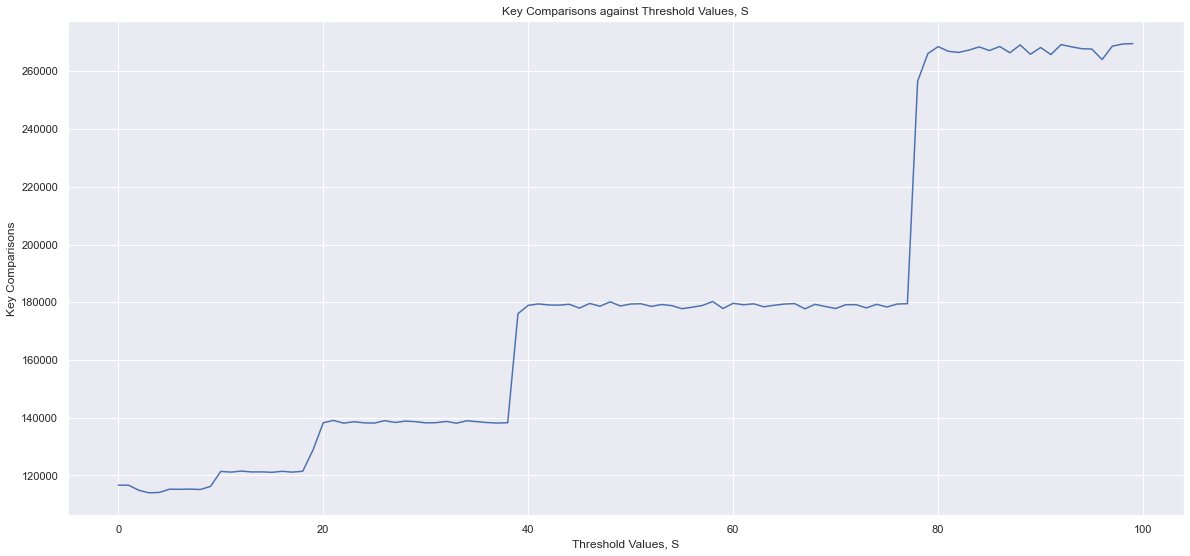

In [14]:
np.random.seed(22)
if __name__ == '__main__':
 sValues = range(0,100)
 arraySize = 10000 # Set array size to 10000
 sComparisons = []
 for s in sValues:
    arr = np.random.randint(10000,size = arraySize)
    arr, comparisons = hybridSort2(arr,s)
    sComparisons.append(comparisons)
    
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sValues,sComparisons) 
ax.set_xlabel("Threshold Values, S")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Threshold Values, S")

The plot of number of key comparisons against the threshold size presents a staircase pattern. This can be explained as follows:

Consider an array of size n, and set the threshold to be s = n/k. The following binary tree structure illustrates the top-down approach of mergesort method.



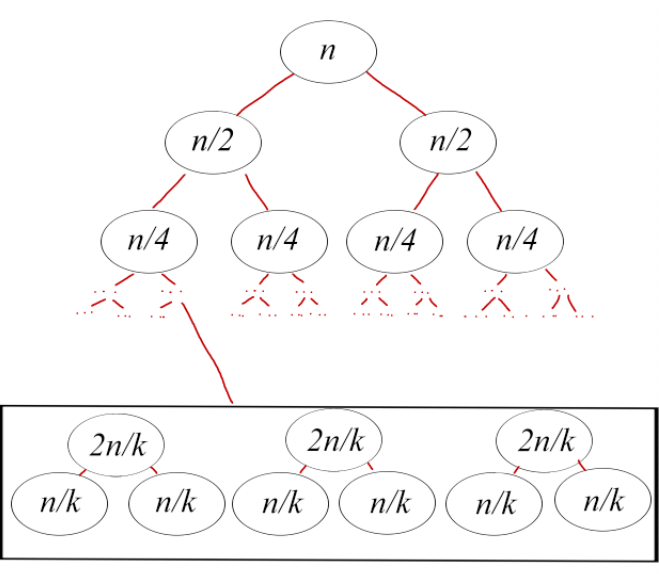

# When the mergesort method splits the array into k n/k-sized subarrays, the Insertion Sort method is called since the array size is now ≤ s.

Now suppose we change the value of s to be such that 2n/k < s < n/k. Notice that since subarray of size 2n/k is bigger than s, the Insertion Sort algorithm will still be called on the level of array size n/k.

Now suppose we change the value of s to be 2n/k. Then, the Insertion Sort aalgorithm will be invoked on the level of array size 2n/k instead.

This shows that whenever the value of s is strictly between the array size of two adjacent levels in the binary tree structure, the number of Insertion Sort method called is the same => the number of key comparisons is the same.

This explains the staircase pattern shown in the plot, where the leveled region is when 2n/k ≤ s ≤ n/k and the spike region is when s = 2n/k or s = n/k.

We shall determine the optimal threshold value in Ciii.

## c iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.


In [15]:
import pandas as pd
import random

ARRSIZE = 10000000 #array size

ascending_sorted = [x for x in range(0, ARRSIZE)] #sorted array in ascending order
descending_sorted = [x for x in range(ARRSIZE, 0, -1)] #sorted array in descending order
df = pd.DataFrame({'Ascending': ascending_sorted, 'Descending': descending_sorted}) #initialise dataset with two columns of sorted arrays

itersize = 10
count = 0
while count < itersize: #generate columns with values in random order
    colname = 'rand' + str(count) #generate column name
    df[colname] = [random.randint(0, ARRSIZE) for x in range(0, ARRSIZE)] #add new column with new random array
    count += 1

df.to_csv("exampleClass1DatasetSize" + str(ARRSIZE) +".csv")

print(df)

         Ascending  Descending    rand0    rand1    rand2    rand3    rand4  \
0                0    10000000  4242255  3809334  3835792  2262368  6995203   
1                1     9999999  2422911  5317248  7394327  8968326   201300   
2                2     9999998   549111  8863417  1645840  8122437  4008815   
3                3     9999997  6701866  9290070  8672545  4324906  8353307   
4                4     9999996  7568785  2388581   316258  5656479  6240558   
...            ...         ...      ...      ...      ...      ...      ...   
9999995    9999995           5  5440758  4815154  6979786  3137443  5791110   
9999996    9999996           4  5629916  9948512  5825309  1603667  4899737   
9999997    9999997           3  8610106   107866   431282  5366219  7045179   
9999998    9999998           2   620733  8230595  9817669  8402283  8953876   
9999999    9999999           1  9843806  4054520  6469021  5685786  1861359   

           rand5    rand6    rand7    rand8    rand

In [ ]:
data1k = pd.read_csv("exampleClass1DatasetSize1000.csv")
data10k = pd.read_csv("exampleClass1DatasetSize10000.csv")
data100k = pd.read_csv("exampleClass1DatasetSize100000.csv")
data1m = pd.read_csv("exampleClass1DatasetSize1000000.csv")
data10m = pd.read_csv("exampleClass1DatasetSize10000000.csv")

In [ ]:
def insertionSort2(arr):
    comparisons = 0
    for i in range(1, len(arr)): # Traverse through array from index 1
        key = arr[i] # Pick up value at each index starting from index 1
        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right 
        if j > 0 :
            comparisons += 1
        arr[j + 1] = key 
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr, comparisons

def merge2(arr1, arr2): 
    comparisons = 0 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
        comparisons += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr, comparisons

def hybridSort2(arr,S):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    
    if len(arr) > S:
        m = len(arr)//2 
        arr[:m], first_half_comparisons = hybridSort2(arr[:m],S)
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = hybridSort2(arr[m:],S)
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        return arr, comparisons
    else:
        arr, comparisons = insertionSort2(arr)
        return arr, comparisons
    

# When input dataset is 1000

In [ ]:
s_values = [x for x in range(3, 25)]
comparisons_df1k = pd.DataFrame(index=s_values)
comparisons_df1k['TheoreticalBest'] = [int(1000*math.log((1000/x),2) + 1000) for x in range(3, 25)]
comparisons_df1k['TheoreticalAvgAndWorst'] = [int(1000*math.log((1000/x),2) + 1000*x) for x in range(3, 25)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data1k[col].tolist()
        arr, comparisons = hybridSort2(temp_arr, s,)
        comparisons_counts.append(comparisons)
    comparisons_df1k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

# when input set is 10000

In [ ]:
s_values = [x for x in range(3, 25)]
comparisons_df10k = pd.DataFrame(index=s_values)
comparisons_df10k['TheoreticalBest'] = [int(10000*math.log((10000/x),2) + 10000) for x in range(3, 25)]
comparisons_df10k['TheoreticalAvgAndWorst'] = [int(10000*math.log((10000/x),2) + 10000*x) for x in range(3, 25)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data10k[col].tolist()
        arr, comparisons = hybridSort2(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df10k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

# When input set is 100000

In [ ]:
s_values = [x for x in range(3, 25)]
comparisons_df100k = pd.DataFrame(index=s_values)
comparisons_df100k['TheoreticalBest'] = [int(100000*math.log((100000/x),2) + 100000) for x in range(3, 25)]
comparisons_df100k['TheoreticalAvgAndWorst'] = [int(100000*math.log((100000/x),2) + 100000*x) for x in range(3, 25)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data100k[col].tolist()
        arr, comparisons = hybridSort2(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df100k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

# When input dataset is 1000000


In [ ]:
s_values = [x for x in range(3, 25)]
comparisons_df10m = pd.DataFrame(index=s_values)
comparisons_df10m['TheoreticalBest'] = [int(10000000*math.log((10000000/x),2) + 10000000) for x in range(3, 25)]
comparisons_df10m['TheoreticalAvgAndWorst'] = [int(10000000*math.log((10000000/x),2) + 10000000*x) for x in range(3, 25)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data10m[col].tolist()
        arr, comparisons = hybridSort2(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df10m[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

# c (iii) Analysis
## Empirical results vs theoretical analysis 

Our empirical results are consistent with our theoretical analysis. For the best case (n + log(n/s)), as s increases, the number of key comparisons decreases. For the average and worst case (ns + nlog(n/s)), the number of key comparisons increases as s increases.

To find the optimal value of s 
From our testing above, we see that the range of 7-18 is the middle ground in the number of key comparisons for the best, worst and average cases. However, we believe that to find the optimal value of s, we need to look at the CPU time.

## (d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [ ]:
np.random.seed(22)
if __name__ == '__main__':
        arr10mil = []
        arr10mil = np.random.randint(10000000,size =10000000)
        arr10mil_2 = arr10mil.copy()

        start_time1 = time.time()
        arr10mil, hybridComparisons = hybridSort2(arr10mil, optimalS)
        end_time1 = (time.time() - start_time1)

        start_time2 = time.time()
        arr10mil_2, mergeComparisons = mergeSort(arr10mil_2)
        end_time2 = (time.time() - start_time2)

print("CPU Time for Hybrid Sort is:", end_time1)
print("CPU Time for Merge Sort is:", end_time2)  
print("Key Comparisons for Hybrid Sort is:", hybridComparisons)  
print("Key Comparisons for Merge Sort is:", mergeComparisons)  